## Set-up

In [5]:
# Import Modules 
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from rembg import remove

In [6]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def display_image(image_array) :
    """Display the image"""
    plt.figure(figsize=(5, 5))
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()


def get_transparent_images(image, masks) :
    """ Returns individual transparent images """
    if len(masks) == 0:
        return
    sorted_masks = sorted(masks, key=(lambda x: x['area']), reverse=True)
    segmentated_items = []

    for mask_details in sorted_masks:
        mask = mask_details['segmentation']
        x,y,w,h = mask_details['bbox']

        transparent = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.uint8)
        transparent[:,:,0:3] = image
        transparent[:, :, 3] = (mask * 255).astype(np.uint8)
        
        segmentated_items.append(transparent[y:y+h, x:x+w])

    return segmentated_items

## Example image

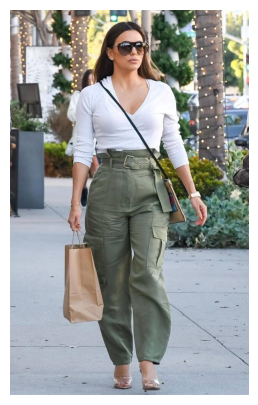

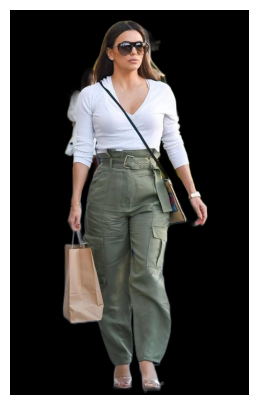

In [8]:
# Read Image
image = cv2.imread('/Users/abhishek/Pictures/Image2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_image(image)

# Remove Background data 
image = remove(image)[:,:,:3]
display_image(image)

## Automatic mask generation

In [9]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/Users/abhishek/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.98,
    stability_score_thresh=0.97,
    crop_n_layers=0,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

In [10]:
# Get Total No. of Items identified. 

masks = mask_generator.generate(image)
masks = sorted(masks, key=(lambda x: x['area']), reverse=True)
print(len(masks))

6


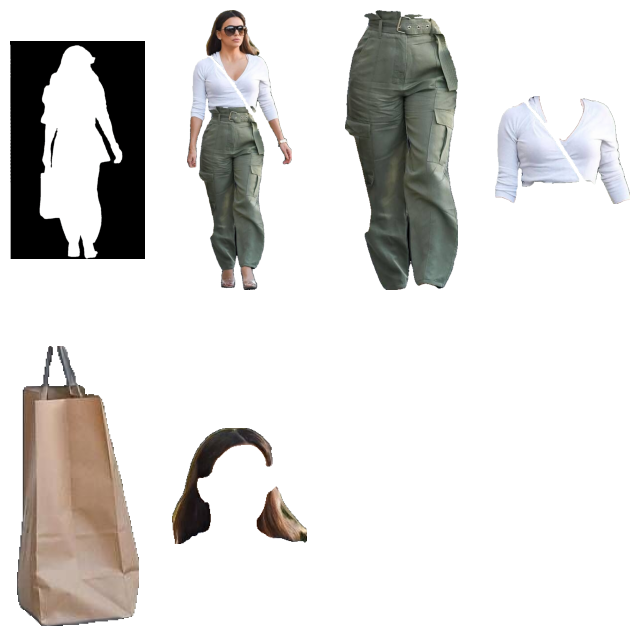

In [11]:
fig = plt.figure(figsize=(8, 8))

# Get segmented Items
segmented_item = get_transparent_images(image, masks)

# Display each item. 
item_no = 1
rows = int(len(masks) / 4) + 1
cols = 4
for item in segmented_item :
    fig.add_subplot(rows, cols, item_no)
    plt.axis('off')
    plt.imshow(item)
    item_no += 1

plt.show()



Show all the masks overlayed on the image.

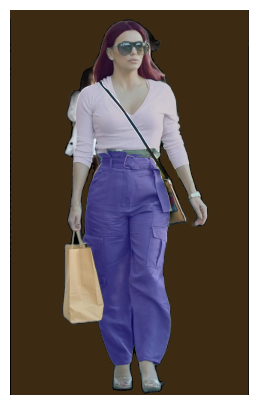

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [9]:
# #subplot(r,c) provide the no. of rows and columns
# fig = plt.figure(figsize=(8, 8))

# # use the created array to output your multiple images. In this case I have stacked 4 images vertically
# item_no = 1
# rows = 1
# cols = 3

# # Read Image
# image = cv2.imread('/Users/abhishek/Pictures/male_image1.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# fig.add_subplot(rows, cols, 1)
# plt.axis('off')
# plt.imshow(image)

# # Remove Background data 
# image = remove(image)[:,:,:3]
# fig.add_subplot(rows, cols, 2)
# plt.axis('off')
# plt.imshow(image)

# # Segmented whole
# fig.add_subplot(rows, cols, 3)
# plt.axis('off')
# plt.imshow(image)
# show_anns(masks)


# plt.show() 